# Итоговая работа по курсу "Медицинские технологии анализа данных"

### 1. Загрузите файл dip_hw_x_taxi.csv в pandas dataframe

In [50]:
# Подгружаем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 300 

In [51]:
# Загружаем файл с обработкой возможных отсутствующих значений
df = pd.read_csv('dip_hw_x_taxi.csv', na_values=["NA", "NaN", "None", ""])
# Проверяем наличие пропущенных значений
print(df.isnull().sum())

order_gk             0
weekday_key          0
hour_key             0
distance_km          0
offer_class_group    0
driver_response      0
dtype: int64


In [52]:
# Проверяем первые строки
print(df.head())

   order_gk  weekday_key  hour_key  distance_km offer_class_group  \
0       412            7        23       53.114           Premium   
1       436            3        10        5.781          Delivery   
2      1327            6        19       16.200          Delivery   
3      2013            2         2       13.732          Delivery   
4      2241            6         3       20.436           Premium   

   driver_response  
0                1  
1                1  
2                0  
3                0  
4                1  


### 2.	Рассчитайте основные описательные статистики (среднее, минимум, 25-50-75-персентили, максимум)

In [53]:
# Рассчитываем описательные статистики
stats = df.describe().T
# Оставляем необходимые статистики в указанном порядке 
desired_order = [ 'min', '25%', "50%", '75%', 'max']
stats = stats[desired_order]
stats

,min,25%,50%,75%,max
order_gk,412.000,227126.500,458637.0000,709420.25000,919196.00
weekday_key,1.000,2.000,4.0000,6.00000,7.00
hour_key,0.000,6.000,12.0000,18.00000,23.00
distance_km,0.024,12.177,22.8285,36.43425,138.95
driver_response,0.000,0.000,1.0000,1.00000,1.00


### 3.	Вычислите количество значений по классам такси

In [54]:
# Смотрим количество заказов по классам
class_counts = df['offer_class_group'].value_counts()
print(class_counts)

Economy     500
Premium     500
Comfort     500
Delivery    500
Name: offer_class_group, dtype: int64


In [55]:
# А теперь смотрим количество состоявшихся поездок (оставляем только строки с driver_response = 1)
completed_rides = df[df['driver_response'] == 1]

# Подсчет количества заказов по классам для состоявшихся поездок
class_counts_completed = completed_rides['offer_class_group'].value_counts()

print(class_counts_completed)

Premium     394
Delivery    326
Comfort     243
Economy     211
Name: offer_class_group, dtype: int64


Даже без сложных статистических методов можно увидеть зависимость количества состоявшихся поездок от класса такси (Premium, Comfort, Economy). Чем выше класс такси, тем больше совершенных поездок.

### 4.	Визуализируйте распределение дистанций поездок

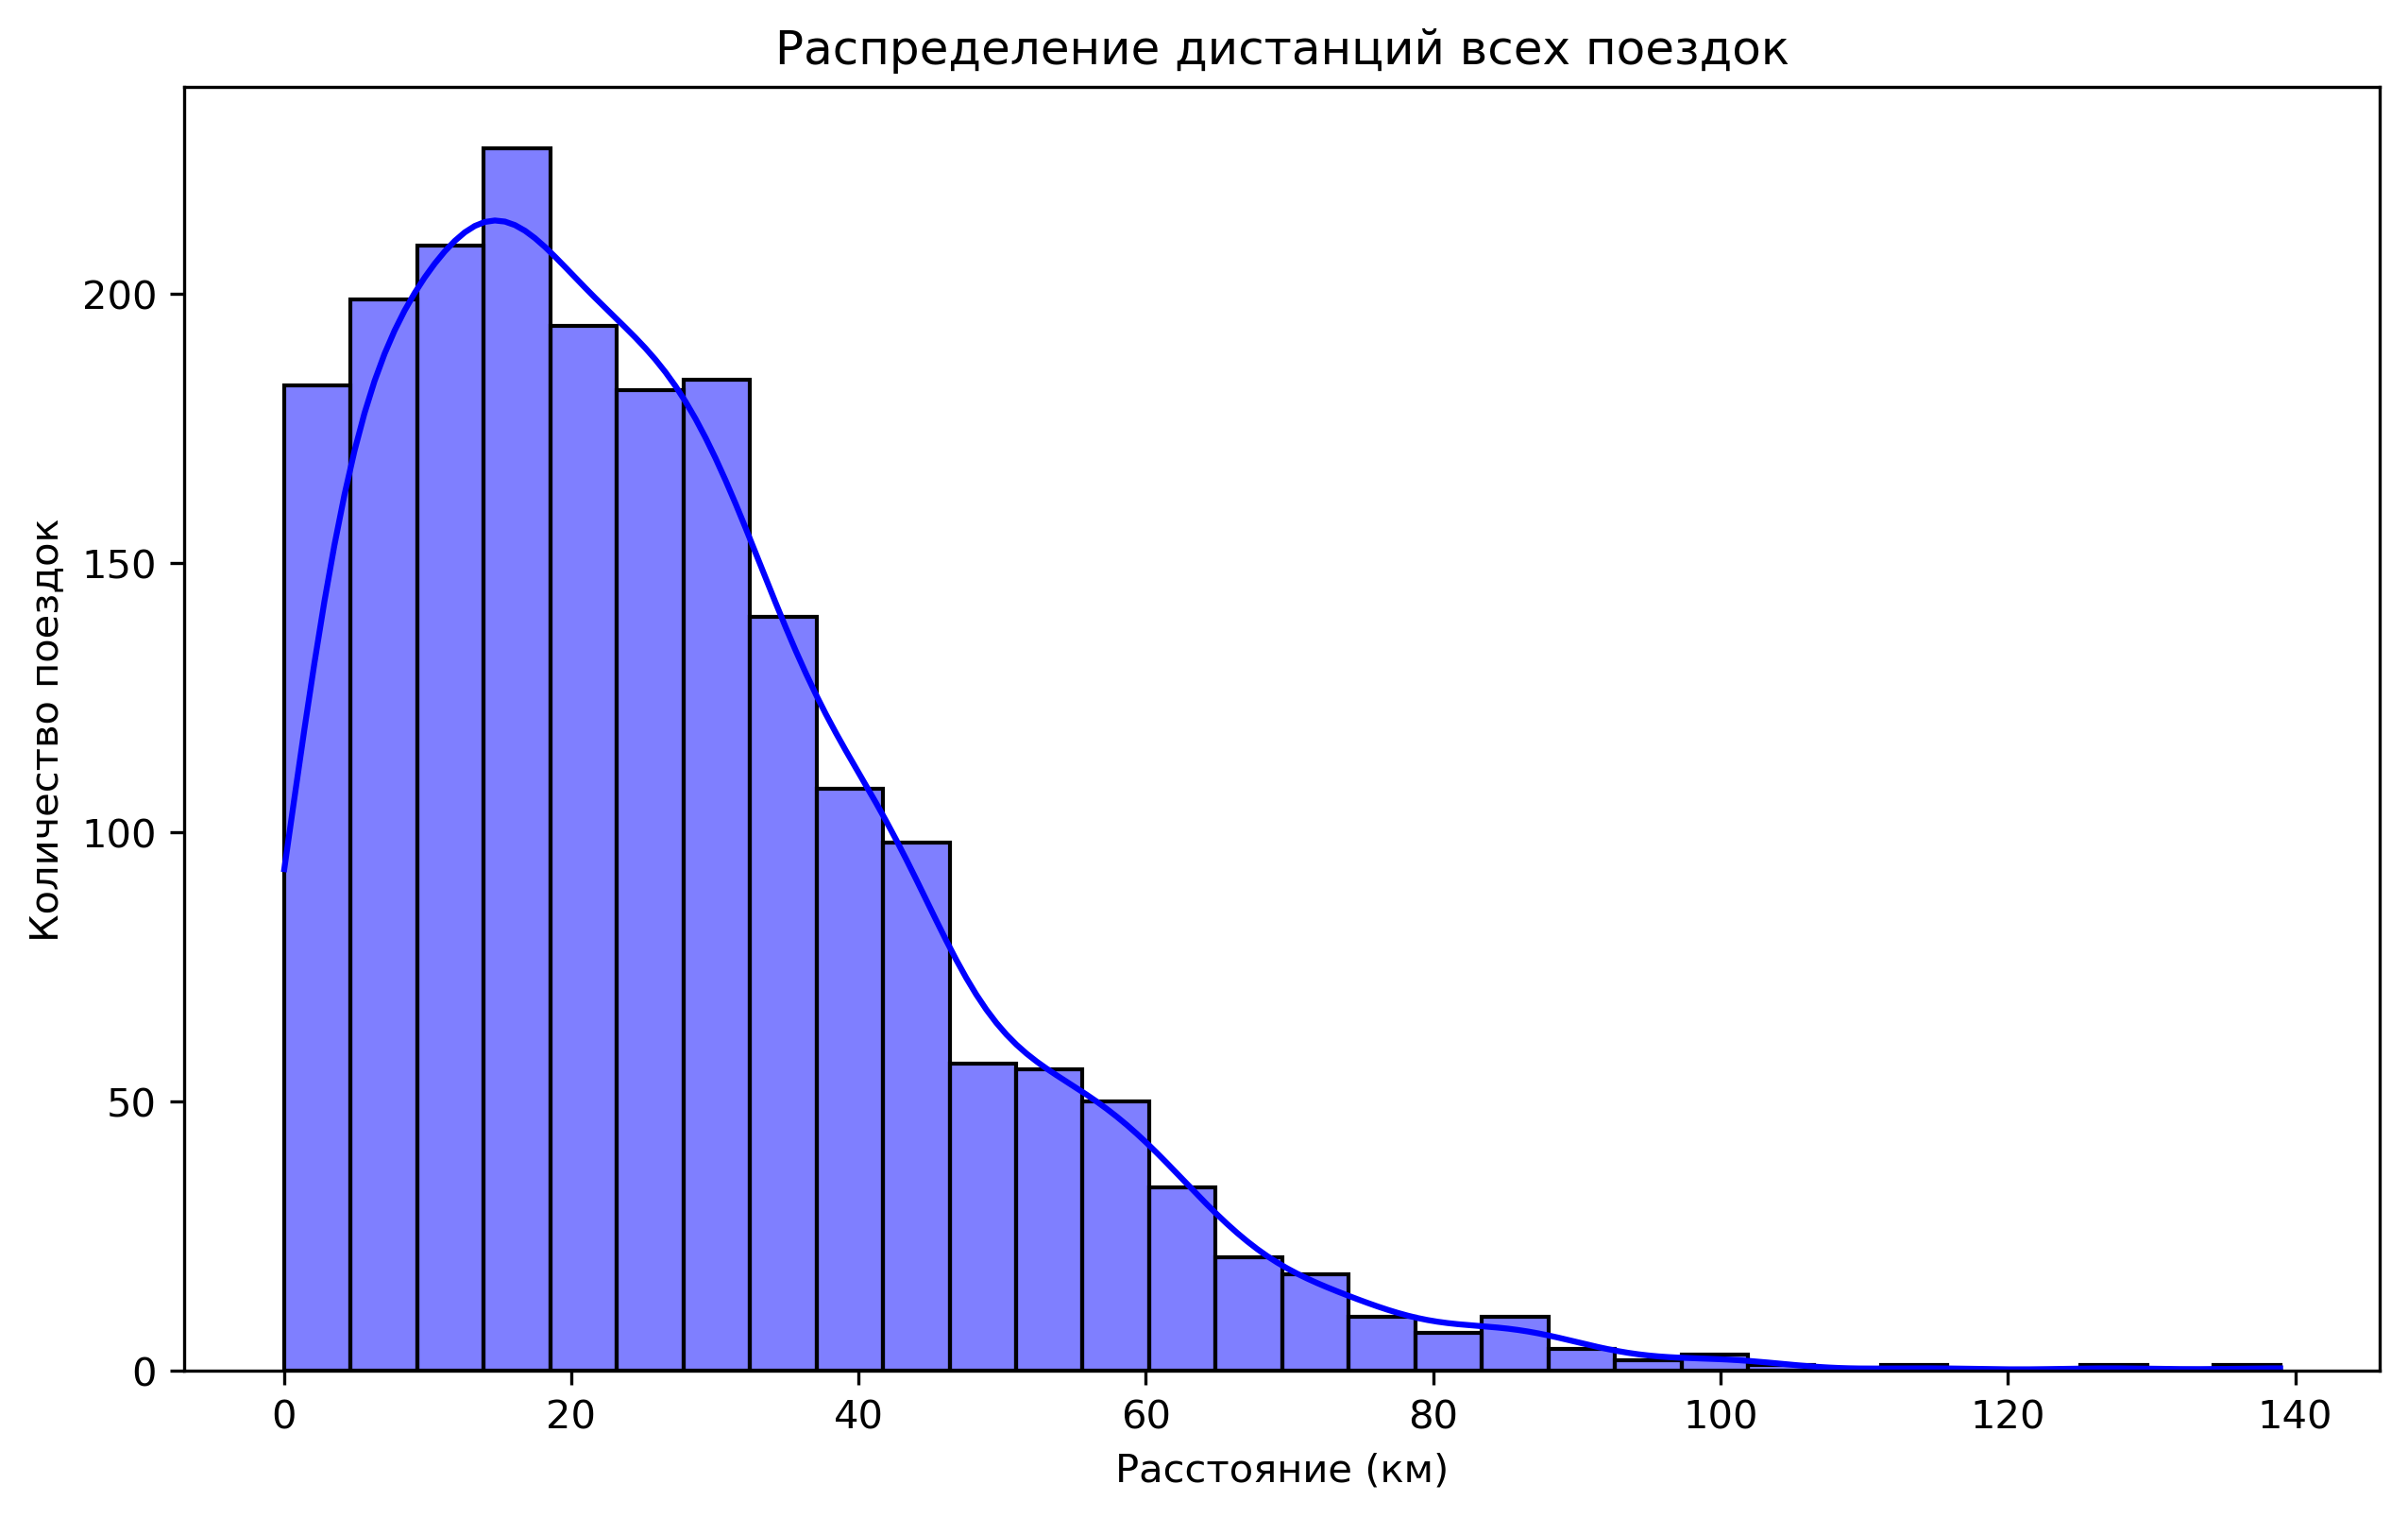

In [56]:
# Строим гистограмму распределения дистанций
plt.figure(figsize=(10, 6))
sns.histplot(df['distance_km'], bins=30, kde=True, color='blue')
plt.title('Распределение дистанций всех поездок')
plt.xlabel('Расстояние (км)')
plt.ylabel('Количество поездок')
plt.show()

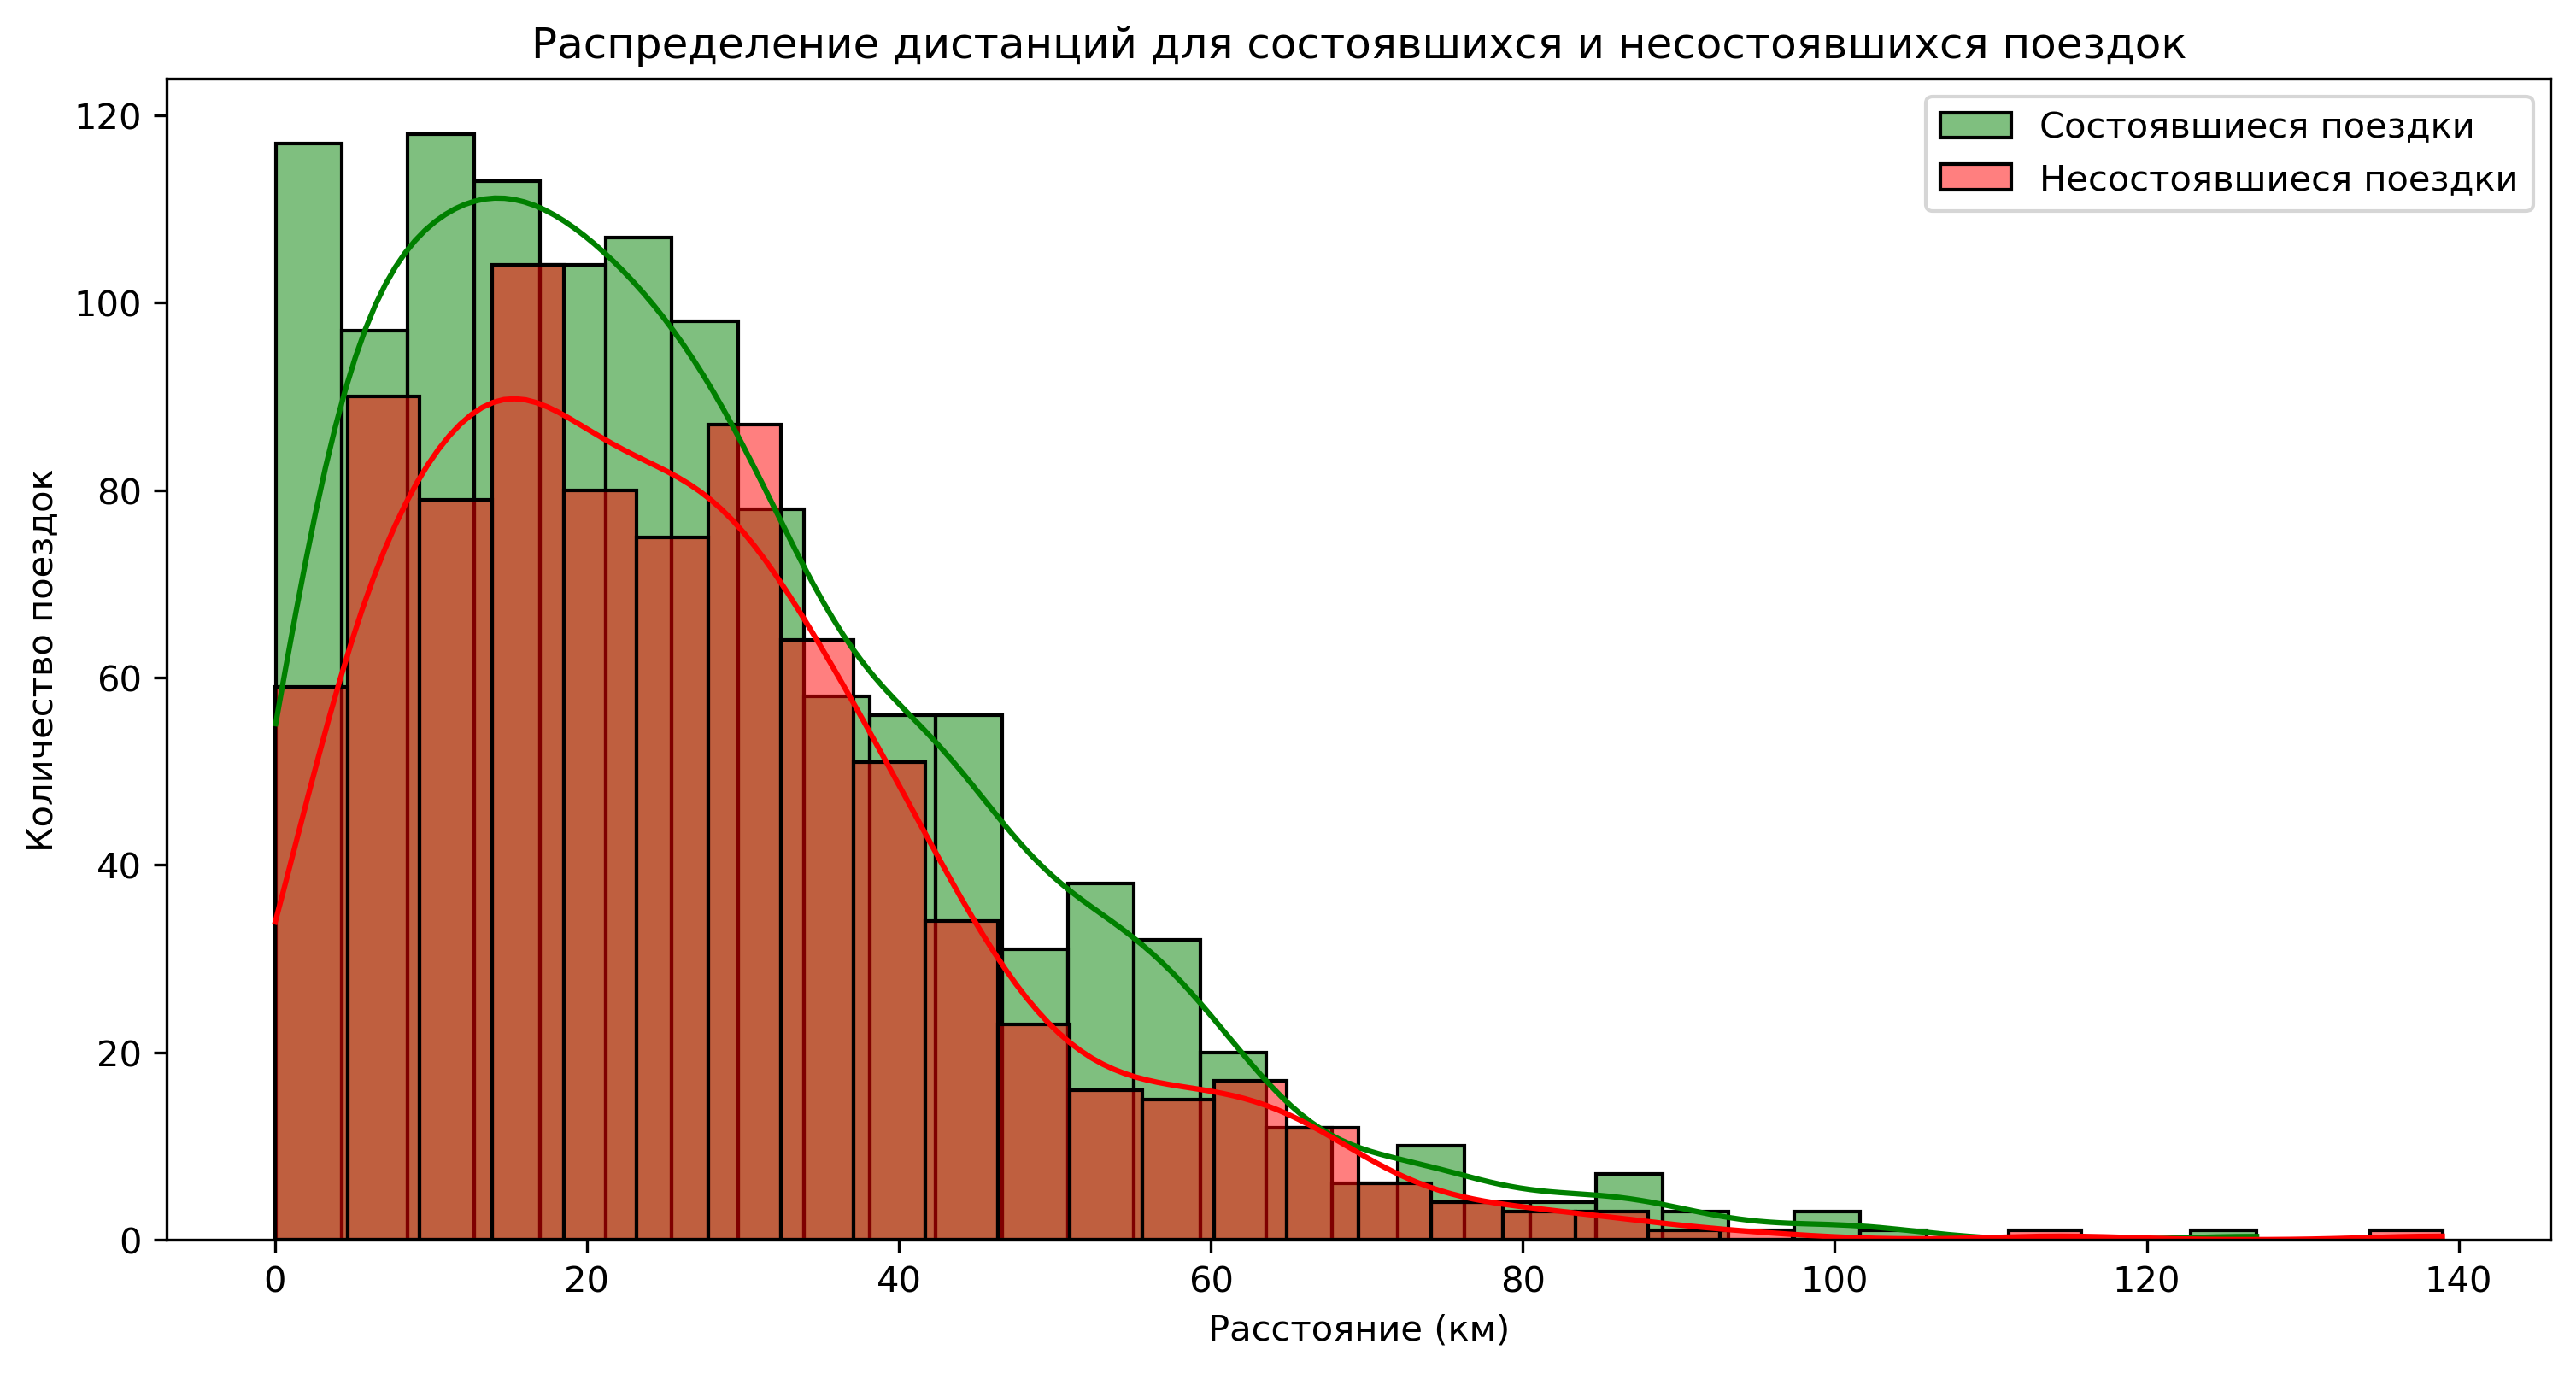

In [58]:
# А теперь посмотрим, есть ли различия по километражу для состоявшихся и несостоявшихся поездок
completed_rides_km = df[df['driver_response'] == 1]['distance_km']
not_completed_rides_km = df[df['driver_response'] == 0]['distance_km']

# Строим графики
plt.figure(figsize=(12, 6))

# Гистограмма для состоявшихся поездок
sns.histplot(completed_rides_km, bins=30, kde=True, color='green', label='Состоявшиеся поездки')

# Гистограмма для несостоявшихся поездок
sns.histplot(not_completed_rides_km, bins=30, kde=True, color='red', label='Несостоявшиеся поездки')

# Добавляем заголовок и подписи осей
plt.title('Распределение дистанций для состоявшихся и несостоявшихся поездок')
plt.xlabel('Расстояние (км)')
plt.ylabel('Количество поездок')

# Добавляем легенду
plt.legend()

# Отображаем график
plt.show()

На основании полученных графиков можно сказать, что:
1) Большинство поездок совершаются на короткие дистанции.

2) Дистанция поездки не влияет на её отмену.

### 5.	Визуализируйте распределения дистанций поездок, по каждому классу такси в отдельности, а также определите типы распределений для эконом-класса и комфорт-класса

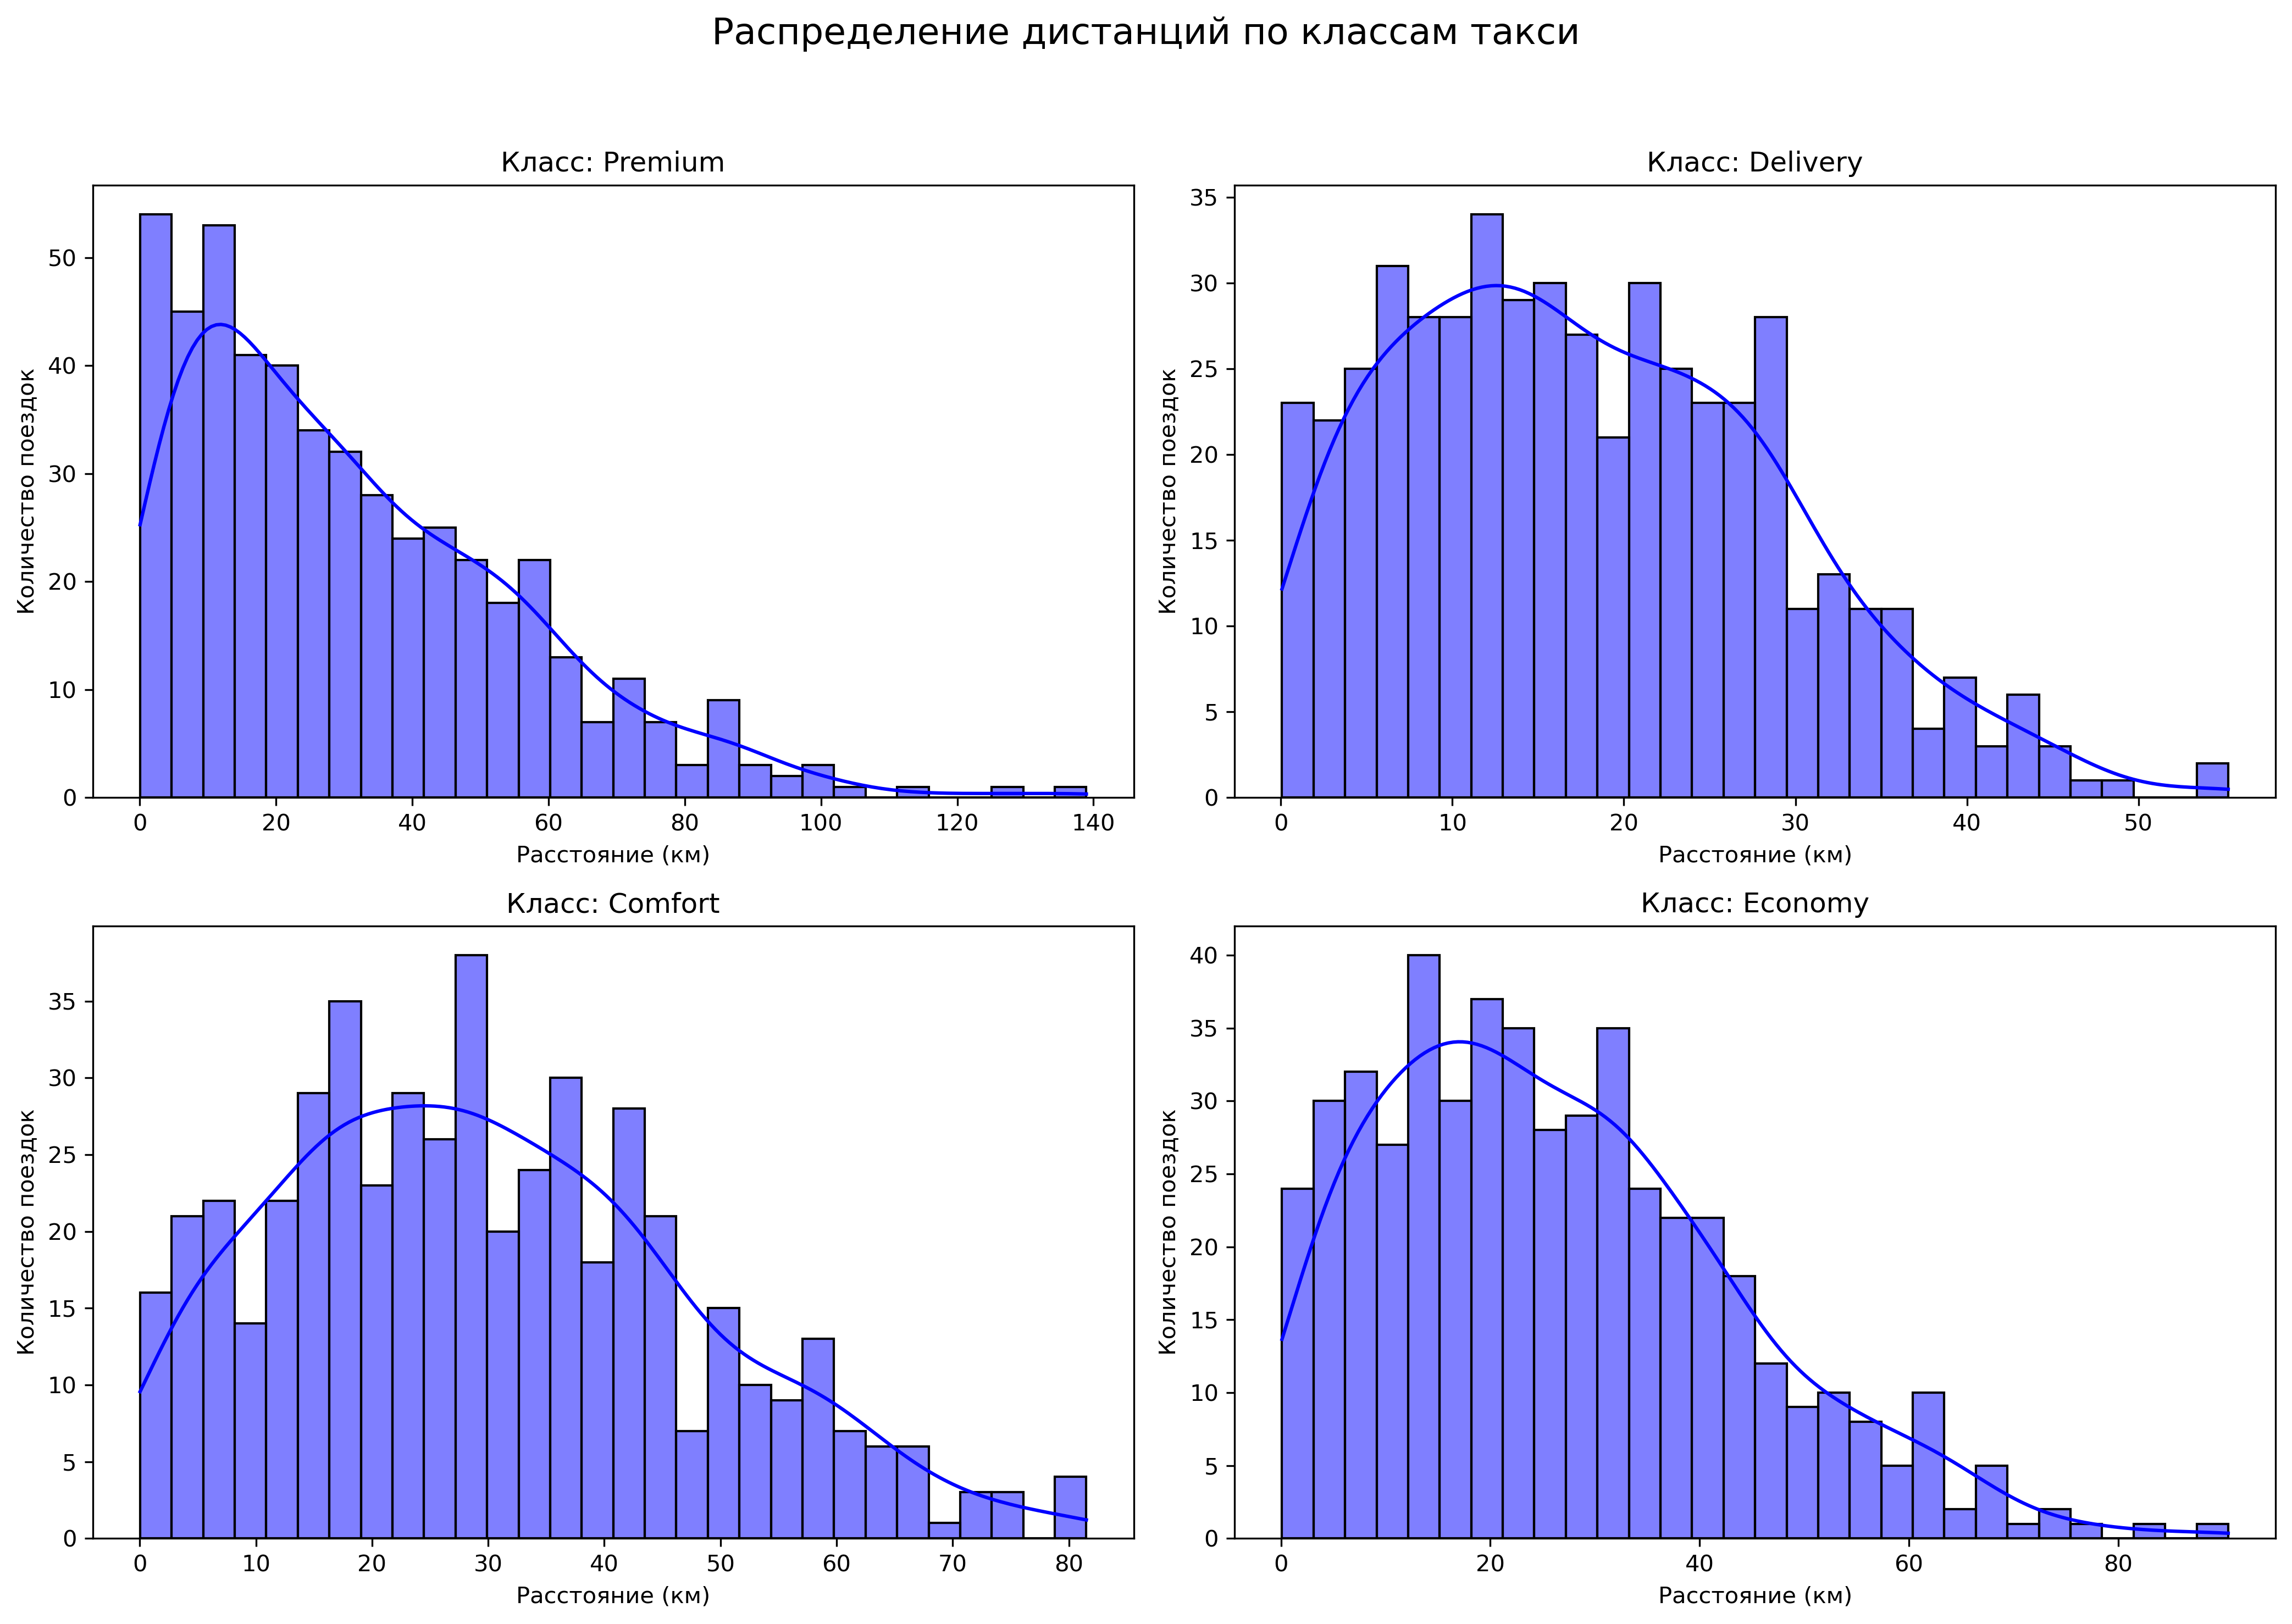

In [59]:
# Создаем сетку 2x2 для будущего графика
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Распределение дистанций по классам такси', fontsize=16)

# Получаем уникальные классы такси
taxi_classes = df['offer_class_group'].unique()

# Проходим по каждому классу и строим график
for i, taxi_class in enumerate(taxi_classes):
    row = i // 2  # Определяем строку для текущего графика
    col = i % 2   # Определяем столбец для текущего графика
    
    subset = df[df['offer_class_group'] == taxi_class]  # Фильтруем данные для класса
    ax = axes[row, col]  # Выбираем соответствующую позицию в сетке
    
    # Строим гистограмму с KDE
    sns.histplot(subset['distance_km'], bins=30, kde=True, ax=ax, color='blue')
    ax.set_title(f'Класс: {taxi_class}')  # Заголовок для каждого графика
    ax.set_xlabel('Расстояние (км)')
    ax.set_ylabel('Количество поездок')

# Настройка макета для избежания пересечения подписей
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Оставляем место для общего заголовка
plt.show()

Учитывая характер формы KED для распределений комфорт- и эконом-класса можно предположить, что они отображают логнормальное распределение. На всякий случай также проведем анализ распределения на нормальность, с использвоанием теста Шапиро-Уилка.

In [81]:
# Для определения типа распределения посчитаем ряд статистических тестов
from scipy.stats import shapiro, kstest, norm, lognorm
# Фильтруем данные для комфорт-класса и эконом-класса
comfort_distances = df[df['offer_class_group'] == 'Comfort']['distance_km']
economy_distances = df[df['offer_class_group'] == 'Economy']['distance_km']

In [82]:
# Проводим тест Шапиро-Уилка для проверки нормальности распределения
shapiro_comfort = shapiro(comfort_distances)
shapiro_economy = shapiro(economy_distances)

print("Тест Шапиро-Уилка для комфорт-класса:")
print(f"Статистика: {shapiro_comfort.statistic}, p-value: {shapiro_comfort.pvalue}")

print("\nТест Шапиро-Уилка для эконом-класса:")
print(f"Статистика: {shapiro_economy.statistic}, p-value: {shapiro_economy.pvalue}")

# Тест Колмогорова-Смирнова для проверки на соответствие логнормальному распределению
# Нулевая гипотеза (H0): Данные соответствуют логнормальному распределению.
# Альтернативная гипотеза (H1): Данные не соответствуют логнормальному распределению.
ks_comfort_lognorm = kstest(comfort_distances, 'lognorm', args=(comfort_distances.mean(), comfort_distances.std()))
ks_economy_lognorm = kstest(economy_distances, 'lognorm', args=(economy_distances.mean(), economy_distances.std()))

print("\nТест Колмогорова-Смирнова для комфорт-класса (логнормальное распределение):")
print(f"Статистика: {ks_comfort_lognorm.statistic}, p-value: {ks_comfort_lognorm.pvalue}")

print("\nТест Колмогорова-Смирнова для эконом-класса (логнормальное распределение):")
print(f"Статистика: {ks_economy_lognorm.statistic}, p-value: {ks_economy_lognorm.pvalue}")

Тест Шапиро-Уилка для комфорт-класса:
Статистика: 0.9735106229782104, p-value: 7.287685832579882e-08

Тест Шапиро-Уилка для эконом-класса:
Статистика: 0.9592134356498718, p-value: 1.5334071512551617e-10

Тест Колмогорова-Смирнова для комфорт-класса (логнормальное распределение):
Статистика: 0.4444563485312206, p-value: 1.5411247329988908e-90

Тест Колмогорова-Смирнова для эконом-класса (логнормальное распределение):
Статистика: 0.43506223133165633, p-value: 1.3938956502652488e-86


При полученных значениях видим, что оба распределения однозначно не являются нормальными (это можно было понять и без теста), однако и логнормальными они тоже не являются (p-value гораздо ниже 0,05, поэтому мы принимаем альтернативную гипотезу).

Выводы:

1) Для эконом-класса и премиум-класса распределение смещено в сторону коротких поездок.

2) В дальних поездках чаще заказывают комфорт-класс.

3) Распределение поездок эконом-класса имеет явную левостороннюю асимметрию, как и распределение комфорт-класса, при этом у последнего более высокое среднее значение дистанции. Однако выявить к какому именно типу распределния оно относится на данный момент не удалось.

### 6.	Сформируйте выборки по эконом- и комфорт-классам. Визуализируйте пересечение интервалов дистанций этих классов (примечание: поможет функция seaborn.distplot или seaborn.kdeplot)

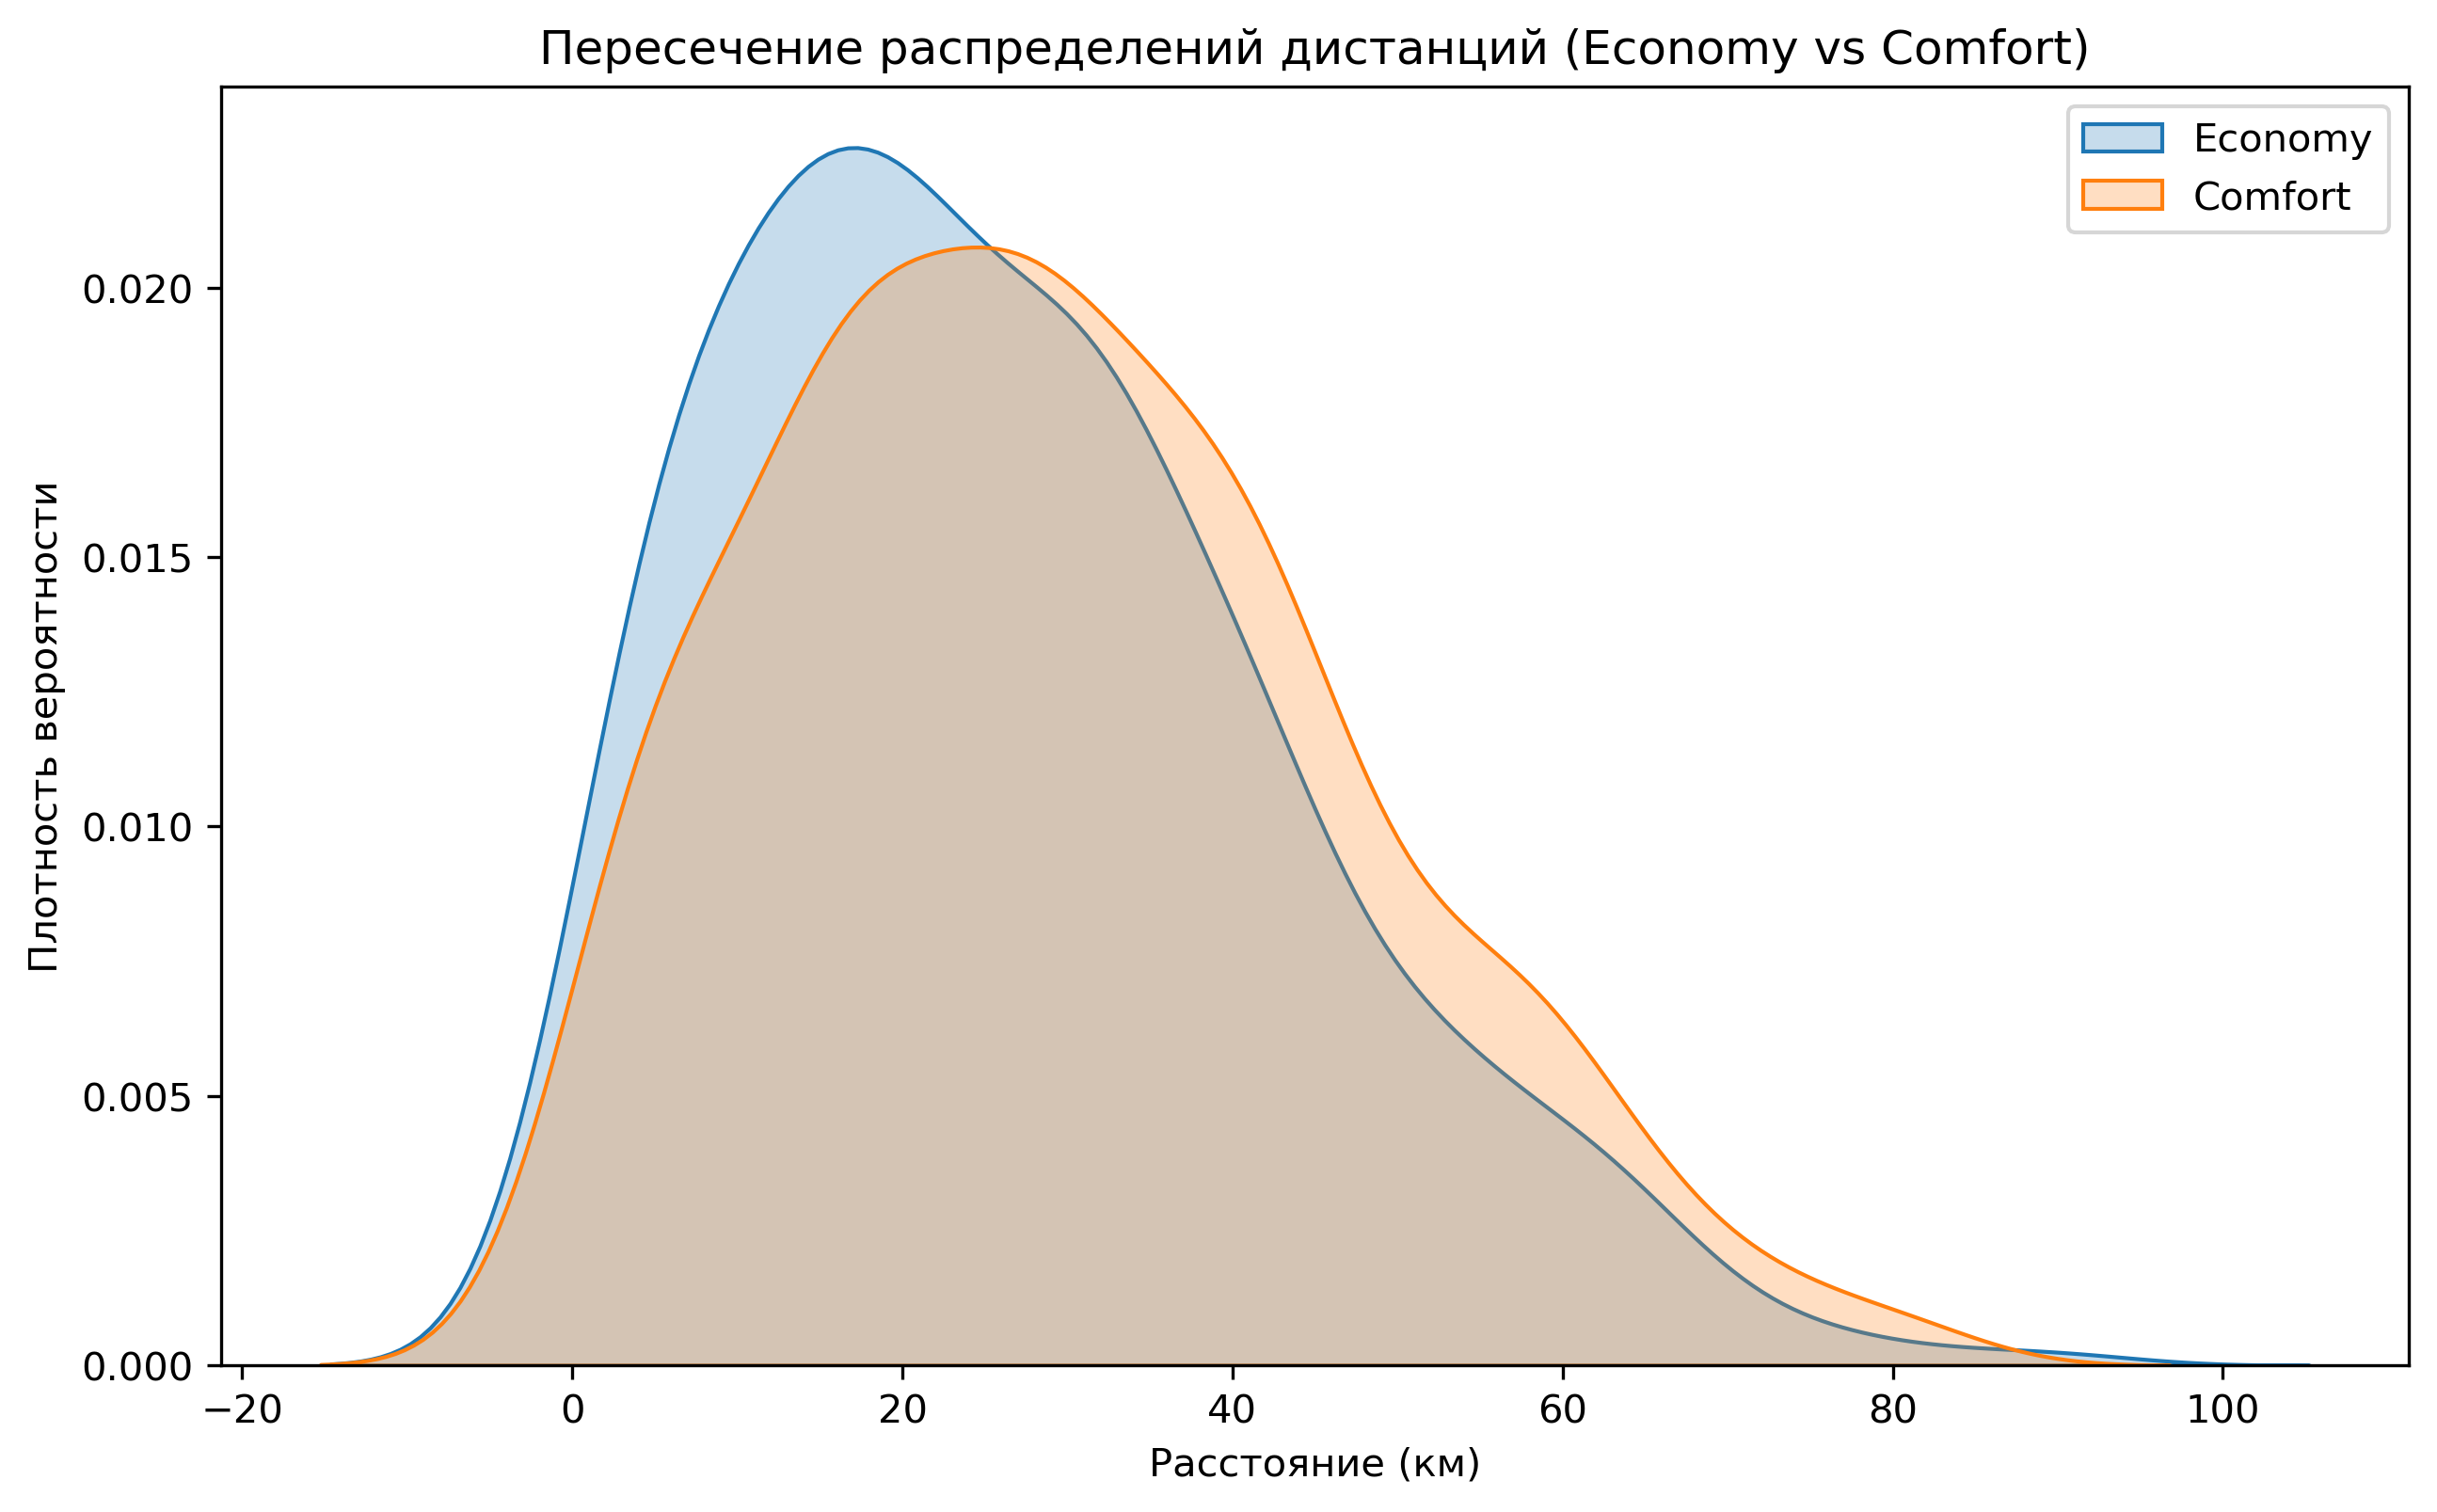

In [83]:
# Формирование выборок
# Выборки были сформированы в задании 5

# Визуализация пересечения
plt.figure(figsize=(10, 6))
sns.kdeplot(economy_distances, label='Economy', shade=True)
sns.kdeplot(comfort_distances, label='Comfort', shade=True)
plt.title('Пересечение распределений дистанций (Economy vs Comfort)')
plt.xlabel('Расстояние (км)')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

Вывод:

График показывает, что распределения дистанций для эконом- и комфорт-классов имеют большую область пересечения, но комфорт-класс, в среднем, имеет более высокие значения дистанций.

### 7.	Проведите статистический тест (поможет: функция scipy.stats.ttest_ind), проверьте гипотезу, что дистанции поездок в комфорт-классе отличаются от дистанций поездок эконом-класса (примечание: H0 – выборки не отличаются, H1 – выборки отличны; уровень значимости = 5%)

In [84]:
from scipy.stats import ttest_ind

# Проведение t-теста
t_stat, p_value = ttest_ind(economy_distances, comfort_distances)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -3.1706426042389815
P-value: 0.0015673809987275479


### 8.	Сделайте выводы по результатам проведения статистического теста

Вывод:

Поскольку p-value < 0.05, то отвергаем H0, т.е. выборки отличаются. Получается что комфорт-класс статистически значимо предпочитают заказывать для более длительных поездок.

### 9.	Вычислите средние выборок исследуемых классов, с учётом полученного результата проверки гипотез определите – какой из классов предпочитают на дальние поездки (эконом или комфорт)

In [85]:
# Средние значения
mean_economy = economy_distances.mean()
mean_comfort = comfort_distances.mean()

print(f"Средняя дистанция эконом-класса: {mean_economy}")
print(f"Средняя дистанция комфорт-класса: {mean_comfort}")

Средняя дистанция эконом-класса: 26.28309799999998
Средняя дистанция комфорт-класса: 29.758915999999985


Вывод:
Комфорт-класс предпочитают для дальних поездок, так как средняя дистанция выше.

##### Обобщающие выводы:

1. Клиенты, вызывающие такси премиум класса значительно реже отказываются от поездки. 
2. Дистанция поездки не вияет на отказ клиента.
3. Комфорт-класс используется для более дальних поездок чаще, чем эконом.
4. Клиенты, используещие такси в качестве доставки значительно реже отказываются от заказа, чем клиенты, вызывающие эконом и комфорт класс.

##### Рекомендации:
1) Добавить класс комфорт+, что должно стать более пирвлекательным для большего числа водителей.

2) Уменьшить количество автомобилей эконом класса для поездок с пассажирами. Таким образом спрос на эконом вырастет, что повлият на его цену. Это, в свою очередь, спровоцирует повышенный спрос на комфорт и комфорт+, которых согласно п. 1 должно стать больше.

3) Использовать автомобили эконом класса для доставки.

4) Уменьшить разницу в цене на эконом и комфорт (а может быть даже комфорт+) классы для дальних поездок.

Эти меры должны позволить сократить общее количество отказов, повысить удовлетворенность пользователей от нашего сервиса, увеличить коэффициент удержания клиентов и максимизировать прибыль.

# Дополнительное задание:

Вы справились с исследованием данных! Ваша стажировка продолжается, в мире произошли непредвиденные события — пандемия COVID-19. Вам доверена срочная задача. Чтобы сформировать понимание о стратегии компании, необходимо определить возможные сценарии дальнейшего развития событий.

### 11. Загрузите файл dip_hw_covid.csv в pandas dataframe

In [89]:
# Загружаем файл с обработкой возможных отсутствующих значений
covid = pd.read_csv('dip_hw_covid.csv', na_values=["NA", "NaN", "None", ""])
# Проверяем наличие пропущенных значений
print(covid.isnull().sum())

date         4
country      4
confirmed    4
deaths       4
dtype: int64


In [88]:
# Смотрим на данные
covid

,date,country,confirmed,deaths
0,2020-01-22 00:00:00,Russia,0.0,0.0
1,2020-01-22 00:00:00,US,1.0,0.0
2,2020-01-23 00:00:00,Russia,0.0,0.0
3,2020-01-23 00:00:00,US,1.0,0.0
4,2020-01-24 00:00:00,Russia,0.0,0.0
...,...,...,...,...
1115,2021-08-01 00:00:00,US,35003417.0,613228.0
1116,NaN,NaN,NaN,NaN
1117,NaN,NaN,NaN,NaN
1118,NaN,NaN,NaN,NaN


In [90]:
# Удаляем строки с пропущенными значениями
covid_cleaned = covid.dropna()

# Проверяем, что пропущенные значения удалены
print(covid_cleaned.isnull().sum())

date         0
country      0
confirmed    0
deaths       0
dtype: int64


### 12.	Исследуйте данные:

•	Рассчитайте коэффициент корреляции между заболеваемостью и смертностью

•	Визуализируйте динамики заболеваемости и смертности по доступным странам в отдельности, сравните характер распространения

In [97]:
# Разделяем данные по странам
russia_data = covid[covid['country'] == 'Russia']
us_data = covid[covid['country'] == 'US']

In [98]:
# Рассчитываем коэффициент корреляции для России
russia_corr = russia_data[['confirmed', 'deaths']].corr().iloc[0, 1]
print(f"Коэффициент корреляции между заболеваемостью и смертностью в России: {russia_corr:.2f}")

Коэффициент корреляции между заболеваемостью и смертностью в России: 0.99


In [99]:
# Рассчитываем коэффициент корреляции для США
us_corr = us_data[['confirmed', 'deaths']].corr().iloc[0, 1]
print(f"Коэффициент корреляции между заболеваемостью и смертностью в США: {us_corr:.2f}")

Коэффициент корреляции между заболеваемостью и смертностью в США: 0.99


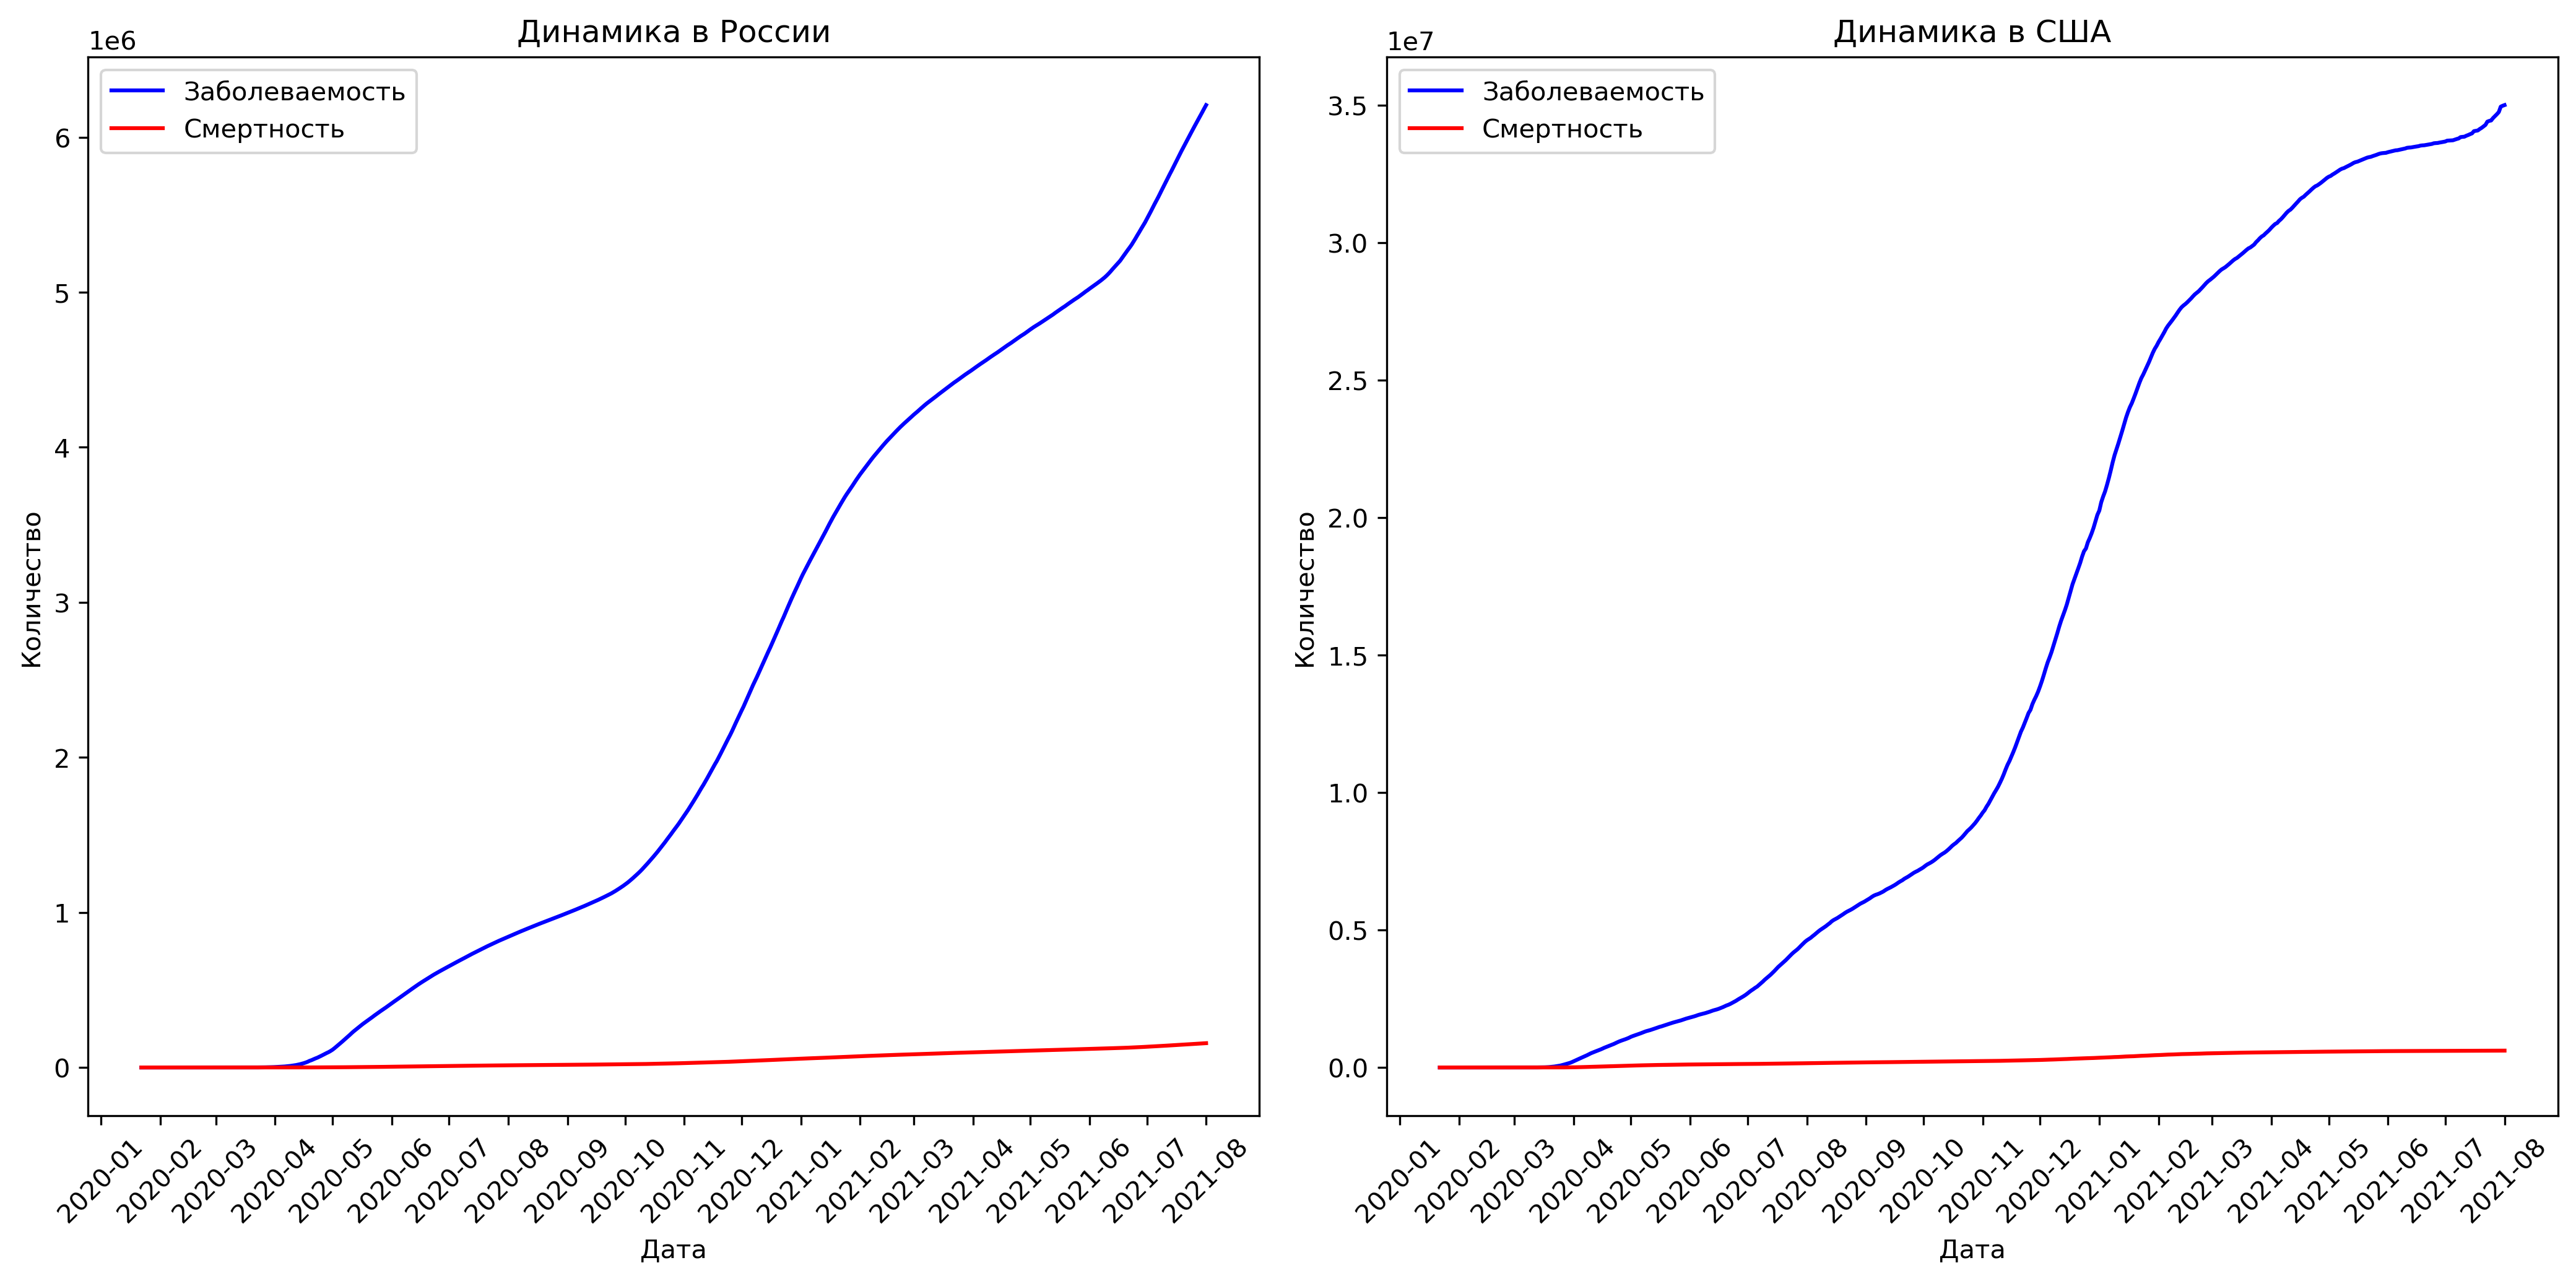

In [102]:
import matplotlib.dates as mdates

# Устанавливаем размер графика
plt.figure(figsize=(14, 7))

# График для России
plt.subplot(1, 2, 1)
plt.plot(russia_data['date'], russia_data['confirmed'], label='Заболеваемость', color='blue')
plt.plot(russia_data['date'], russia_data['deaths'], label='Смертность', color='red')
plt.title('Динамика в России')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.legend()

# Форматируем ось X: отображаем только первый день каждого месяца
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# Но подпишем каждую из этих точек в формате год-месяц
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)  # Поворот меток для лучшей читаемости

# График для США
plt.subplot(1, 2, 2)
plt.plot(us_data['date'], us_data['confirmed'], label='Заболеваемость', color='blue')
plt.plot(us_data['date'], us_data['deaths'], label='Смертность', color='red')
plt.title('Динамика в США')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.legend()

# Аналогично графику для России
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)  

# Отображение графиков
plt.tight_layout()
plt.show()

Выводы:

1. Для обеих стран коэффициент корреляции равен 0,99, что говорит нам об очень высокой положительной связи между заболеваемостью и смертностью.
2. При этом в США рост числа заболевших выше, как и смертность, что может быть связано как с большим числом населения в этой стране, так и с менее эффективными мерами контроля его распространения.

### 13. Постройте модель линейной регрессии по смертям от заболеваемости и вычислите прогноз количества смертей в России для 25 000 000 случаев заражений (примечание: сформируйте выборку по России, выделите признак и целевую переменную [используем 100% данных для обучения], постройте прогноз смертей для 25 000 000 заболевших [поможет метод predict], сделайте выводы по полученному прогнозу)

In [106]:
# Выделяем признак X - количество заражений, и целевую переменную y - количество смертей
X = russia_data[['confirmed']]
y = russia_data['deaths']

In [104]:
# Используем все данные (100%) для обучения модели. Это допустимо, так как мы не проверяем 
# качество модели на тестовой выборке, а строим прогноз для конкретного значения.
from sklearn.linear_model import LinearRegression

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [105]:
# Теперь сделаем прогноз количества смертей для 25 000 000 случаев заражений с помощью метода predict.
predicted_deaths = model.predict([[25000000]])

# Вывод прогноза
print(f"Прогноз количества смертей для 25 000 000 случаев заражений: {predicted_deaths[0]:.0f}")

Прогноз количества смертей для 25 000 000 случаев заражений: 582420


Чтобы лучше понять модель, выведем её коэффициенты:
1. Коэффициент наклона (coef_) показывает, как изменяется количество смертей с увеличением числа заражений.
2. Свободный член (intercept_) показывает значение смертей при нулевом количестве заражений.

In [107]:
# Выводим коэффициентов модели
print(f"Коэффициент наклона (slope): {model.coef_[0]:.6f}")
print(f"Свободный член (intercept): {model.intercept_:.2f}")

Коэффициент наклона (slope): 0.023525
Свободный член (intercept): -5713.83


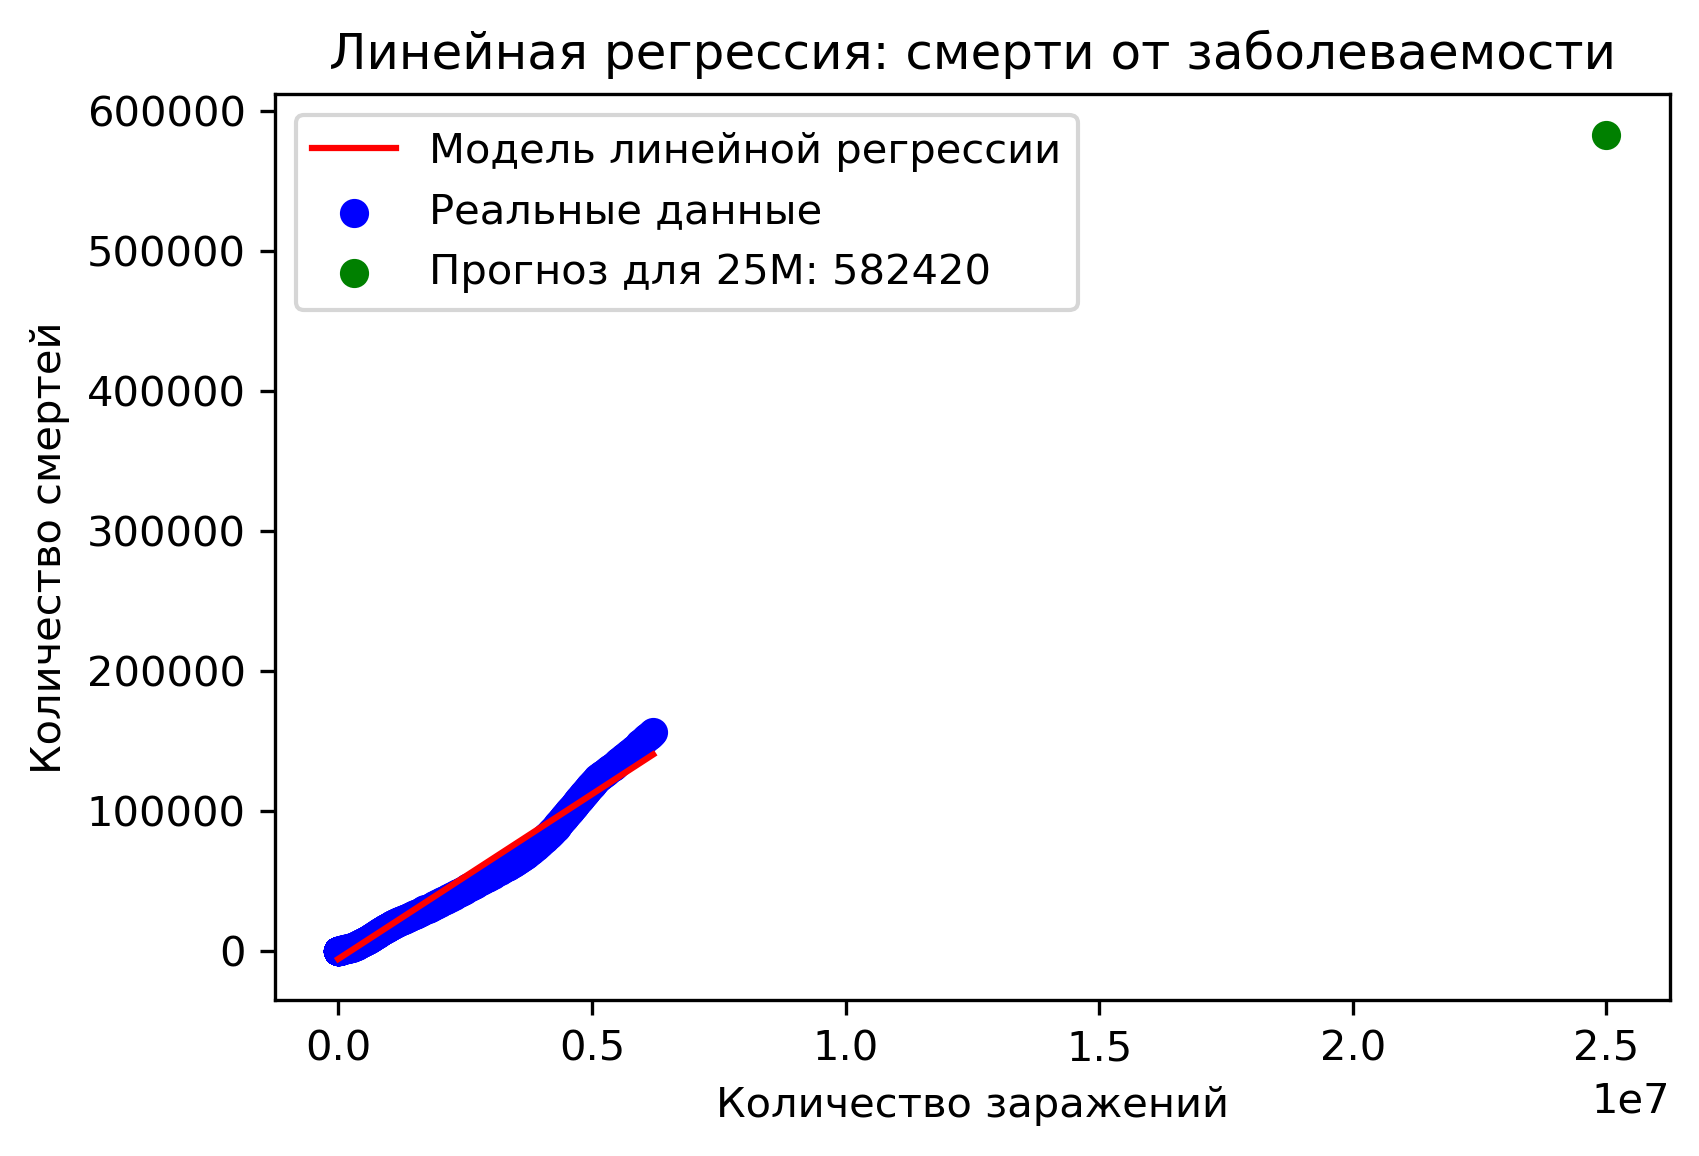

In [108]:
# Построим график, чтобы увидеть, насколько хорошо модель соответствует данным
# График реальных данных
plt.scatter(X, y, color='blue', label='Реальные данные')

# График предсказаний модели
plt.plot(X, model.predict(X), color='red', label='Модель линейной регрессии')

# Добавление прогноза для 25 000 000 случаев заражений
plt.scatter(25000000, predicted_deaths, color='green', label=f'Прогноз для 25M: {predicted_deaths[0]:.0f}')

# Настройка графика
plt.title('Линейная регрессия: смерти от заболеваемости')
plt.xlabel('Количество заражений')
plt.ylabel('Количество смертей')
plt.legend()
plt.show()

##### Ограничения модели:
Линейная регрессия предполагает линейную зависимость между заражениями и смертями. Однако в реальности эта зависимость может быть нелинейной (например, на ранних этапах эпидемии смертность может расти быстрее).
Модель не учитывает другие факторы, такие как уровень здравоохранения, возрастное распределение населения и меры по сдерживанию эпидемии.

#####  Выводы:
При рассчитанном коэффициенте наклона на каждую 1000 случаев заражения будет приходиться 23 смертельных исхода.
Таким образом, модель предсказывает 582420 смертей для 25.000.000 случаев заражений, то есть примерно 2,33% заражённых могут умереть.

# Задание со звёздочкой:

Вы исследовали данные компании! Но у инфраструктурного отдела произошли неполадки, возникло подозрение о сбое работы логики записи состоявшихся поездок. Вам доверена задача проверить наличие ошибок в имеющихся данных, чтобы удостовериться в корректности сделанных выводов и помочь коллегам.

Загрузите файл dip_db_check_taxi.csv (содержит случайный семпл данных заказанных поездок) в pandas dataframe; проверьте предположение компании о нарушении работы базы данных (фантомном задвоении фиксации заказов такси), для этого постройте коллаборативную фильтрацию по идентификаторам поездок для определения наиболее похожих/идентичных записей, после, удалите дубликаты получившихся пар и сделайте выводы о наличии задвоений и корректности работы базы.

In [111]:
import pandas as pd

# Загрузжаем данные
taxi_data = pd.read_csv('dip_db_check_taxi.csv', na_values=["NA", "NaN", "None", ""])

# Проверяем наличие пропущенных значений
print(taxi_data.isnull().sum())

order_gk             0
weekday_key          0
hour_key             0
distance_km          0
offer_class_group    0
dtype: int64


In [112]:
# Смотрим на данные
taxi_data

,order_gk,weekday_key,hour_key,distance_km,offer_class_group
0,4957,3,27,14.239,1
1,9314,3,21,39.518,2
2,13922,2,21,17.203,2
3,37826,5,19,36.971,2
4,38936,2,19,49.634,2
...,...,...,...,...,...
95,814413,4,22,11.877,3
96,838313,5,24,49.928,1
97,842245,2,15,10.893,3
98,848459,4,20,29.096,3


In [113]:
# Проверяем датасет на явное наличие дубликатов
print("Количество явных дубликатов:", taxi_data.duplicated().sum())

Количество явных дубликатов: 0


Нужны более сложные статистические методы, например коллаборативная фильтрация. 

In [118]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

In [119]:
# Выбираем признаки для сравнения
features = ['weekday_key', 'hour_key', 'distance_km', 'offer_class_group']

In [120]:
# Масштабируем данные
scaler = StandardScaler()
scaled_features = scaler.fit_transform(taxi_data[features])

In [121]:
# Вычисляем матрицу косинусного сходства
similarity_matrix = cosine_similarity(scaled_features)

In [122]:
# Преобразуем матрицу сходства в датафрейм
similarity_df = pd.DataFrame(similarity_matrix, index=taxi_data['order_gk'], columns=taxi_data['order_gk'])

In [123]:
# Просматриваем верхние строки матрицы сходства
print(similarity_df.head())

order_gk    4957      9314      13922     37826     38936     43032   \
order_gk                                                               
4957      1.000000 -0.191095  0.299501 -0.556187 -0.365862  0.018646   
9314     -0.191095  1.000000  0.269060  0.293309  0.976198  0.536898   
13922     0.299501  0.269060  1.000000 -0.317967  0.294799 -0.300760   
37826    -0.556187  0.293309 -0.317967  1.000000  0.320554  0.712668   
38936    -0.365862  0.976198  0.294799  0.320554  1.000000  0.415257   

order_gk    61028     68743     68812     86889   ...    792785    796337  \
order_gk                                          ...                       
4957      0.031221 -0.554322 -0.577418  0.161450  ...  0.804388  0.141024   
9314      0.852297  0.474863 -0.609558 -0.394335  ... -0.366486  0.880485   
13922     0.372582  0.600629 -0.733299  0.530142  ...  0.237108  0.441878   
37826    -0.239020  0.059873  0.311409 -0.798512  ... -0.930217  0.334658   
38936     0.824934  0.636123 -0.5

In [124]:
# Создаём список пар с высоким сходством (т.е. выше 0,95)
threshold = 0.95
similar_pairs = []

for i in range(len(similarity_df)):
    for j in range(i + 1, len(similarity_df)):
        if similarity_df.iloc[i, j] > threshold:
            similar_pairs.append((similarity_df.index[i], similarity_df.columns[j], similarity_df.iloc[i, j]))

# Преобразовываем список пар в датафрейм
similar_pairs_df = pd.DataFrame(similar_pairs, columns=['Order_GK_1', 'Order_GK_2', 'Similarity'])

# Просматриваем найденные пары
print(similar_pairs_df)

    Order_GK_1  Order_GK_2  Similarity
0         4957      740380    0.979161
1         4957      804604    0.969026
2         9314       38936    0.976198
3        68743      183685    0.990353
4        86889      699904    0.999415
5        94794      100864    0.969851
6        94794      274427    0.956552
7        94794      330292    1.000000
8        94794      462142    0.963953
9       100864      330292    0.969819
10      103837      755209    0.960360
11      111907      549348    0.959624
12      111907      558065    0.953844
13      111907      607437    0.984327
14      111962      229198    0.985101
15      111962      420234    0.979379
16      127048      183685    0.965982
17      127048      508570    0.976510
18      142869      261386    0.960962
19      165000      293849    0.972263
20      179226      274427    0.965780
21      190596      323099    0.989014
22      191612      204791    0.981486
23      197454      747749    0.968643
24      200303      21888

In [125]:
# Создаём список уникальных идентификаторов для удаления
to_remove = set()

for _, row in similar_pairs_df.iterrows():
    to_remove.add(row['Order_GK_2'])  # Удаляем вторую запись из пары

# Удаляем дубликаты из исходного датафрейма
cleaned_data = taxi_data[~taxi_data['order_gk'].isin(to_remove)]

# Проверяем полученный результат
print("Количество записей до очистки:", len(taxi_data))
print("Количество записей после очистки:", len(cleaned_data))

Количество записей до очистки: 100
Количество записей после очистки: 60


То есть 40% записей оказались дубликатами. Это говорит о серьезных проблемах с логикой заиписи.

##### Вывод:

В данных наблюдается большое количество задвоений записей, что указывает на возможные проблемы с логикой записи заказов такси.
Рекомендуется провести дополнительное исследование причин возникновения таких ошибок и исправить логику записи данных.